In [38]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import random
import keras
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout
from keras.optimizers import Adam
from keras.callbacks import TensorBoard
%matplotlib inline
sns.set_style('whitegrid')
from sklearn.model_selection import train_test_split

In [39]:
ftrain=pd.read_csv(r'C:\Users\neeraj\Documents\Data\fashion-mnist_test\fashion-mnist_train.csv')
ftest=pd.read_csv(r'C:\Users\neeraj\Documents\Data\fashion-mnist_test\fashion-mnist_test.csv')

In [40]:
train=np.array(ftrain,dtype='float32')
test=np.array(ftest,dtype='float32')

In [41]:
class_name=['T_shirt/top','Trouser','Pullover','Dress','Coat','Sandal','Shirt','Sneaker','Bag','Ankle boot']

Text(0.5, 1.0, 'Dress')

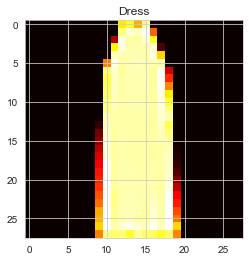

In [42]:
i=random.randint(1,60000)
plt.imshow(train[i,1:].reshape(28,28))

plt.imshow(train[i,1:].reshape(28,28),cmap='hot')
label_index=ftrain['label'][i]
plt.title(f"{class_name[label_index]}")

In [43]:
label=train[i,0]
label

3.0

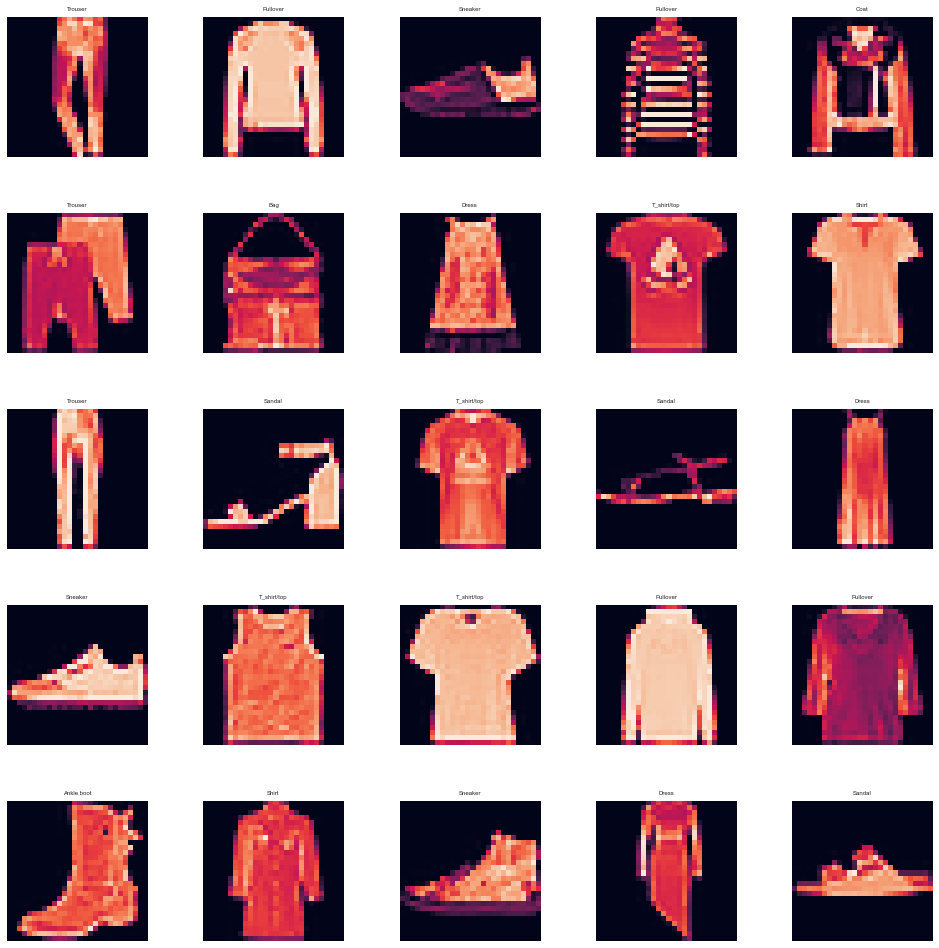

In [44]:
w_grid=5
l_grid=5

fig,axes = plt.subplots(l_grid,w_grid,figsize=(17,17))
axes=axes.ravel()
n_trian=len(train)

for i in np.arange(0,w_grid*l_grid):
    index=np.random.randint(0,n_trian)
    axes[i].imshow(train[index,1:].reshape((28,28)))
    label_index=int(train[index,0])
    axes[i].set_title(class_name[label_index],fontsize=6)
    axes[i].axis('off')
    
plt.subplots_adjust(hspace=0.4)

In [45]:
x_train=train[:,1:]/255
y_train=train[:,0]

x_test=test[:,1:]/255
y_test=test[:,0]

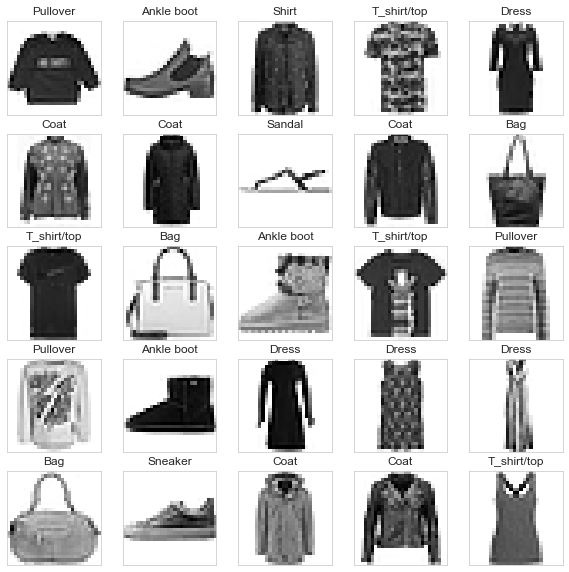

In [46]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(x_train[i].reshape((28,28)),cmap=plt.cm.binary)
    label_index=int(y_train[i])
    plt.title(class_name[label_index])
plt.show()

In [47]:
x_train,x_validate,y_train,y_validate = train_test_split(x_train,y_train,test_size=0.2,random_state=42)

In [48]:
print(x_train.shape,  '  ' , y_train.shape)

(48000, 784)    (48000,)


In [49]:
x_train=x_train.reshape(x_train.shape[0],*(28,28,1))
x_test=x_test.reshape(x_test.shape[0],*(28,28,1))
x_validate=x_validate.reshape(x_validate.shape[0],*(28,28,1))

In [50]:
model = Sequential()

model.add(Conv2D(32,(3,3), input_shape=(28,28,1),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Conv2D(64,(3,3), input_shape=(28,28,1),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Conv2D(128,(3,3), input_shape=(28,28,1),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(units=512 ,activation='relu'))
model.add(Dropout(0.25))
model.add(Dense(units=512 ,activation='softmax'))

In [51]:
model.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_8 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 13, 13, 32)        0         
_________________________________________________________________
dropout_9 (Dropout)          (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
dropout_10 (Dropout)         (None, 5, 5, 64)          0         
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 3, 3, 128)        

In [52]:
model.compile(loss='sparse_categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

In [53]:
f_model=model.fit(x_train,y_train,batch_size=512,epochs=200,verbose=1,validation_data=(x_validate,y_validate))

Train on 48000 samples, validate on 12000 samples
Epoch 1/200
48000/48000 [==============================] - 4s 92us/step - loss: 1.9631 - accuracy: 0.3621 - val_loss: 0.8795 - val_accuracy: 0.6934
Epoch 2/200
48000/48000 [==============================] - 4s 81us/step - loss: 0.8020 - accuracy: 0.7012 - val_loss: 0.6401 - val_accuracy: 0.7565
Epoch 3/200
48000/48000 [==============================] - 4s 80us/step - loss: 0.6719 - accuracy: 0.7481 - val_loss: 0.5710 - val_accuracy: 0.7858
Epoch 4/200
48000/48000 [==============================] - 4s 80us/step - loss: 0.6131 - accuracy: 0.7728 - val_loss: 0.5266 - val_accuracy: 0.8059
Epoch 5/200
48000/48000 [==============================] - 4s 80us/step - loss: 0.5746 - accuracy: 0.7891 - val_loss: 0.4836 - val_accuracy: 0.8238
Epoch 6/200
48000/48000 [==============================] - 4s 80us/step - loss: 0.5372 - accuracy: 0.8027 - val_loss: 0.4498 - val_accuracy: 0.8347
Epoch 7/200
48000/48000 [==============================] - 4s 

Epoch 56/200
48000/48000 [==============================] - 4s 90us/step - loss: 0.2502 - accuracy: 0.9066 - val_loss: 0.2645 - val_accuracy: 0.9031
Epoch 57/200
48000/48000 [==============================] - 4s 84us/step - loss: 0.2541 - accuracy: 0.9042 - val_loss: 0.2547 - val_accuracy: 0.9046
Epoch 58/200
48000/48000 [==============================] - 4s 83us/step - loss: 0.2519 - accuracy: 0.9049 - val_loss: 0.2509 - val_accuracy: 0.9053
Epoch 59/200
48000/48000 [==============================] - 4s 82us/step - loss: 0.2519 - accuracy: 0.9056 - val_loss: 0.2564 - val_accuracy: 0.9043
Epoch 60/200
48000/48000 [==============================] - 4s 87us/step - loss: 0.2468 - accuracy: 0.9082 - val_loss: 0.2500 - val_accuracy: 0.9057
Epoch 61/200
48000/48000 [==============================] - 4s 82us/step - loss: 0.2464 - accuracy: 0.9079 - val_loss: 0.2477 - val_accuracy: 0.9048
Epoch 62/200
48000/48000 [==============================] - 4s 81us/step - loss: 0.2482 - accuracy: 0.9062

Epoch 111/200
48000/48000 [==============================] - 4s 84us/step - loss: 0.2099 - accuracy: 0.9204 - val_loss: 0.2488 - val_accuracy: 0.9105
Epoch 112/200
48000/48000 [==============================] - 4s 84us/step - loss: 0.2107 - accuracy: 0.9212 - val_loss: 0.2419 - val_accuracy: 0.9126
Epoch 113/200
48000/48000 [==============================] - 4s 84us/step - loss: 0.2103 - accuracy: 0.9204 - val_loss: 0.2444 - val_accuracy: 0.9110
Epoch 114/200
48000/48000 [==============================] - 4s 82us/step - loss: 0.2098 - accuracy: 0.9207 - val_loss: 0.2438 - val_accuracy: 0.9127
Epoch 115/200
48000/48000 [==============================] - 4s 84us/step - loss: 0.2067 - accuracy: 0.9215 - val_loss: 0.2429 - val_accuracy: 0.9121
Epoch 116/200
48000/48000 [==============================] - 4s 85us/step - loss: 0.2083 - accuracy: 0.9215 - val_loss: 0.2438 - val_accuracy: 0.9128
Epoch 117/200
48000/48000 [==============================] - 5s 94us/step - loss: 0.2073 - accuracy:

48000/48000 [==============================] - 5s 97us/step - loss: 0.1906 - accuracy: 0.9278 - val_loss: 0.2386 - val_accuracy: 0.9142
Epoch 166/200
48000/48000 [==============================] - 4s 86us/step - loss: 0.1900 - accuracy: 0.9276 - val_loss: 0.2483 - val_accuracy: 0.9131
Epoch 167/200
48000/48000 [==============================] - 4s 82us/step - loss: 0.1910 - accuracy: 0.9276 - val_loss: 0.2461 - val_accuracy: 0.9136
Epoch 168/200
48000/48000 [==============================] - 4s 83us/step - loss: 0.1912 - accuracy: 0.9277 - val_loss: 0.2453 - val_accuracy: 0.9143
Epoch 169/200
48000/48000 [==============================] - 4s 84us/step - loss: 0.1892 - accuracy: 0.9276 - val_loss: 0.2428 - val_accuracy: 0.9130
Epoch 170/200
48000/48000 [==============================] - 4s 84us/step - loss: 0.1854 - accuracy: 0.9308 - val_loss: 0.2536 - val_accuracy: 0.9108
Epoch 171/200
48000/48000 [==============================] - 5s 99us/step - loss: 0.1903 - accuracy: 0.9277 - val_

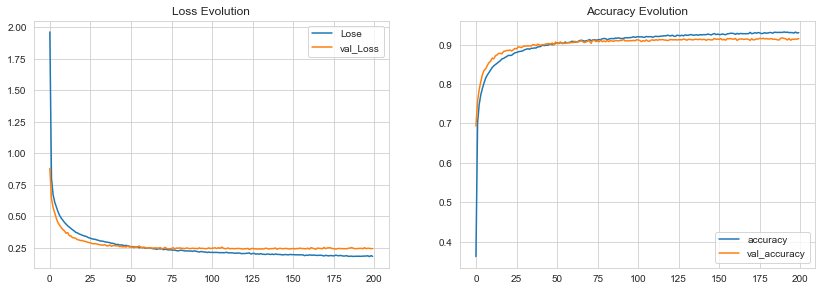

In [56]:
plt.figure(figsize=(14,10))

plt.subplot(2,2,1)
plt.plot(f_model.history['loss'],label='Lose')
plt.plot(f_model.history['val_loss'],label='val_Loss')
plt.legend()
plt.title('Loss Evolution')

plt.subplot(2,2,2)
plt.plot(f_model.history['accuracy'],label='accuracy')
plt.plot(f_model.history['val_accuracy'],label='val_accuracy')
plt.legend()
plt.title('Accuracy Evolution')
plt.show()

In [55]:
pred_class=model.predict_classes(x_test)

In [59]:
test_img=x_test[0]
prediction=model.predict(x_test)
prediction[0]

array([9.91420627e-01, 1.90823538e-10, 1.07772241e-04, 8.18072806e-07,
       3.22836513e-06, 2.07630944e-11, 8.46749824e-03, 1.91256603e-12,
       2.39720759e-08, 7.12326465e-12, 5.53663913e-17, 1.26428297e-16,
       7.14540054e-17, 7.46156750e-17, 5.37200835e-17, 6.57753046e-17,
       9.85876140e-17, 5.62116872e-17, 8.03397317e-17, 7.29005590e-17,
       5.52404448e-17, 8.44507135e-17, 6.70997332e-17, 8.81538356e-17,
       9.99592316e-17, 7.47393153e-17, 8.56942703e-17, 9.93278744e-17,
       7.22714583e-17, 7.39681183e-17, 6.84602204e-17, 6.36903528e-17,
       9.15501664e-17, 9.24746963e-17, 7.28188468e-17, 4.44806746e-17,
       9.78271173e-17, 5.32591454e-17, 5.71208513e-17, 8.29640052e-17,
       1.10764295e-16, 7.52186830e-17, 9.85146831e-17, 5.08105386e-17,
       9.21447439e-17, 5.92220820e-17, 8.94754784e-17, 8.01621724e-17,
       6.98813563e-17, 7.65137434e-17, 9.83074512e-17, 9.77502756e-17,
       8.99961389e-17, 5.69524440e-17, 1.06532770e-16, 7.07374684e-17,
      

In [60]:
np.argmax(prediction[0])

0

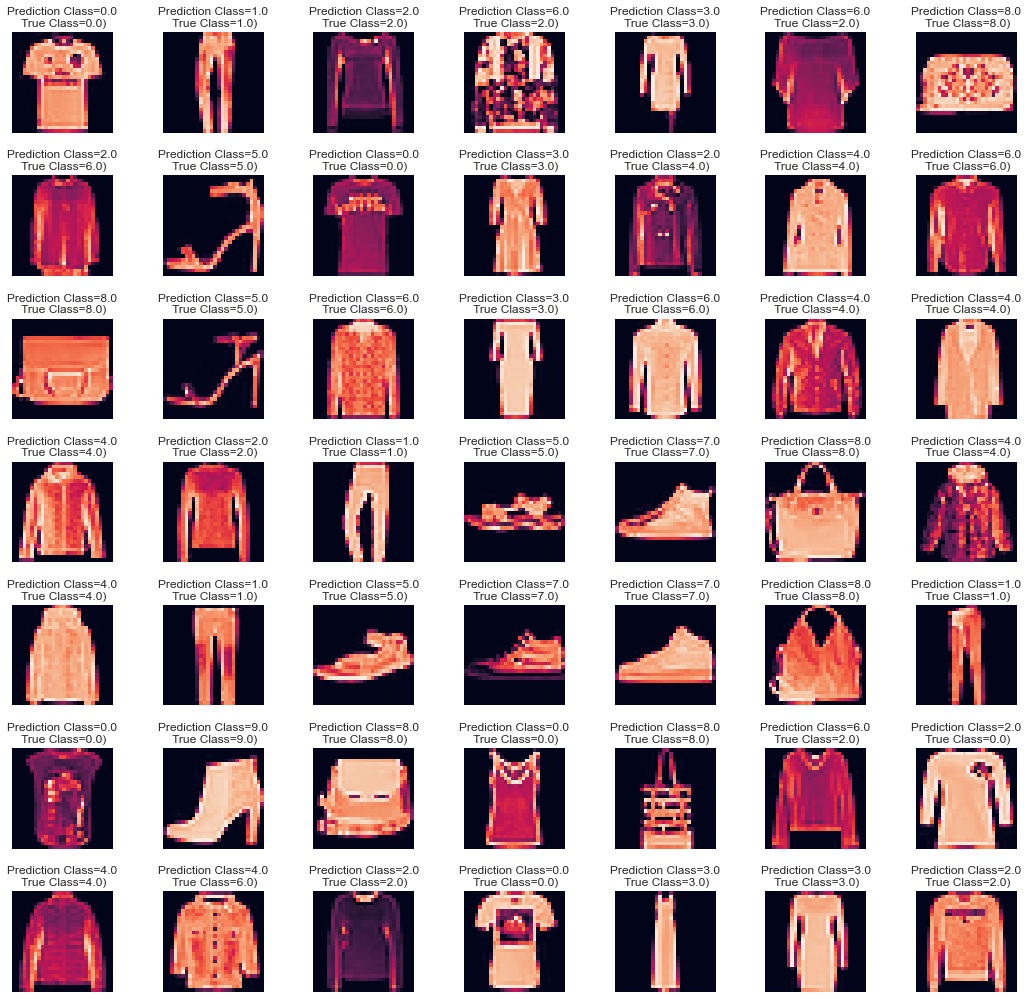

In [63]:
w=7
l=7

fig,axes = plt.subplots(l,w,figsize=(18,18))
axes=axes.ravel()


for i in np.arange(0,w*l):
    
    axes[i].imshow(x_test[i].reshape(28,28))
    label_index=int(train[index,0])
    axes[i].set_title(f"Prediction Class={pred_class[i]:0.1f}\n True Class={y_test[i]:0.1f})")
    axes[i].axis('off')
    
plt.subplots_adjust(wspace=0.5)